<h1>LDA(Linear Discriminant Analysis)</h1><br>

LDA가 약자가 많다. Latent Dirichlet Allocation 라던가. 지금은 그게 아님.


<img src="./img/LDA1.png"/>

<h1>LDA(Linear Discriminant Analysis)차원 축소 방식)</h1><br>



<img src="./img/LDA2.png"/>

<h1>LDA절차</h1><br>



<img src="./img/LDAprocess.png"/>

### 붓꽃 데이터 셋에 LDA 적용하기 

사이킷런에서 해볼 것임.

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
# LDA도 StandardScaler로 정규분포로 데이터셋을 변환시켜줘야함.
iris_scaled = StandardScaler().fit_transform(iris.data)

In [2]:
# componennts는 2개. 4개의 피쳐를 2개의 2차원의 LDA 값으로 매핑을 할 것임.
lda = LinearDiscriminantAnalysis(n_components=2)
# fit()호출 시 target값 입력 **이것이 PCA랑 한가지 다른 점임. 사실 LDA비지도 학습이 아님. 그러므로 타겟값을 넣어줘야 타겟값을 기반으로 함
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


위 결과를 보면 2차원으로 줄어들은 것을 확인할 수 있다.

**이제 시각화를 해보자**

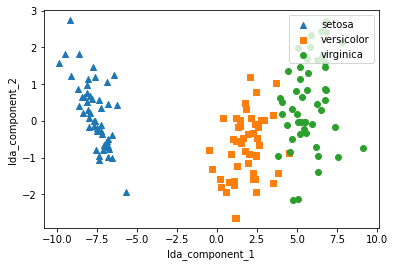

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

위의 분류를 보면 앞의 PCA보다 더 잘 분류 했다. 당연한게, 얘는 타겟값을 봤으니까 더 잘 분류한다.

그리고 versicolor랑 virginica를 보면 상당히 잘 분류했다. 중첩되는 부분이 PCA에 비해 거의 없다.

어떤 측면에서보면 클러스터링에 더 가까울 수 있다.

단지 차원축소인데 비지도 학습과 다르게 

<span style="Color:Red;"><b>타겟값이 들어가야 한다는 점만 유의하면 된다.</b></span>

(150, 2)


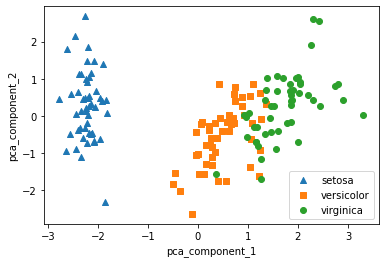

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()